## 4. `K-Means` и `EM`-алгоритм: практика

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_sns = pd.read_csv('snsdata.zip')
df_sns.head(3)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# ЗАДАНИЕ 4.1

df_sns = df_sns.iloc[:, 4:]
df_sns.shape

(30000, 36)

In [7]:
# ЗАДАНИЕ 4.2

from sklearn.preprocessing import StandardScaler

X = df_sns.values
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm[0][0]

-0.3322172643985876

In [9]:
# ЗАДАНИЕ 4.3

from sklearn.cluster import KMeans

model = KMeans(n_clusters=9, random_state=42)
model.fit(X_norm)
model.inertia_

c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


857169.1033997731

In [10]:
# ЗАДАНИЕ 4.4

df_sns.loc[:, 'label'] = model.labels_
df_sns.label.value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: label, dtype: int64

c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

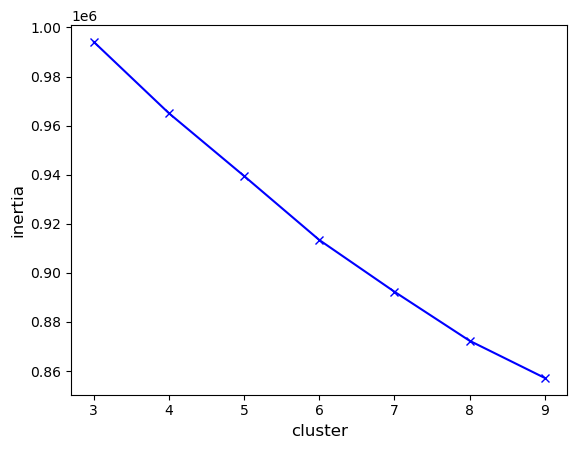

In [12]:
# ЗАДАНИЕ 4.5

def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia
 
inertia = []
for cluster_num in range(3, 10):
    inertia.append(get_inertia(cluster_num, X_norm))
 
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 10)], inertia, 'xb-')

c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

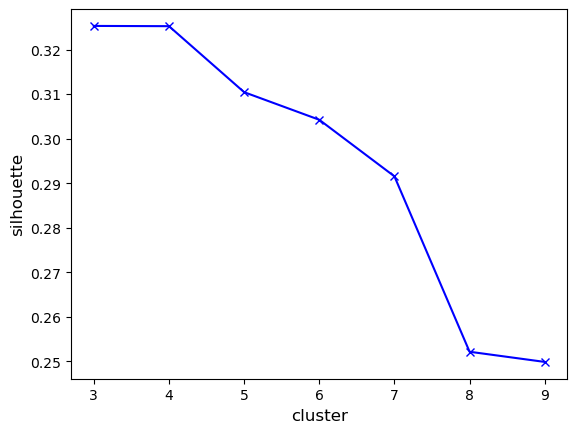

In [31]:
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(3, 10):
    silhouettes.append(get_silhouette(i, X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 10)], silhouettes, 'xb-')

In [32]:
# Чтобы код следующего задания дал правильный ответ

model = KMeans(n_clusters=3, random_state=42)
model.fit(X_norm)
df_sns.loc[:, 'label'] = model.labels_
df_sns['label'].value_counts()

c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    22932
0     5938
1     1130
Name: label, dtype: int64

In [33]:
# ЗАДАНИЕ 4.6

top_list = []
for label, group in df_sns.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)

set.intersection(*top_list)

{'dance', 'god', 'hair', 'music'}

In [43]:
# ЗАДАНИЕ 4.7

from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(X)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([22848,  7151,     1], dtype=int64))

In [42]:
# ЗАДАНИЕ 4.8

a = np.where(predictions == 2)
df_sns.iloc[a].max().sort_values(ascending=False)

blonde          327
sex              22
hair             12
god              10
drunk             6
death             6
die               6
dress             2
football          2
dance             1
rock              1
band              1
label             1
sexy              1
cute              1
clothes           1
swimming          1
jesus             1
shopping          0
mall              0
hollister         0
abercrombie       0
drugs             0
basketball        0
bible             0
church            0
marching          0
kissed            0
hot               0
sports            0
tennis            0
baseball          0
cheerleading      0
volleyball        0
softball          0
soccer            0
music             0
dtype: int64